#Suport Vector Machine

Importando o dataset

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
import sklearn.metrics as metrics

In [ ]:
df = pd.read_csv('water_potability.csv')
df = df.dropna().reset_index(drop=True)
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
1,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
2,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
3,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
4,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


In [ ]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000
mean,7.085990,195.968072,21917.441374,7.134338,333.224672,426.526409,14.357709,66.400859,3.969729,0.403282
std,1.573337,32.635085,8642.239815,1.584820,41.205172,80.712572,3.324959,16.077109,0.780346,0.490678
min,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000,0.000000
25%,6.089723,176.744938,15615.665390,6.138895,307.632511,366.680307,12.124105,55.952664,3.442915,0.000000
50%,7.027297,197.191839,20933.512750,7.143907,332.232177,423.455906,14.322019,66.542198,3.968177,0.000000
75%,8.052969,216.441070,27182.587067,8.109726,359.330555,482.373169,16.683049,77.291925,4.514175,1.000000
max,14.000000,317.338124,56488.672413,13.127000,481.030642,753.342620,27.006707,124.000000,6.494749,1.000000


In [ ]:
#Número de linhas
df.shape[0]

2011

In [ ]:
#Número de colunas
df.shape[1]

10

Preparas os dados para treino e teste

In [ ]:
X = df.drop(['Potability'], axis=1)
y = df['Potability']

In [ ]:
from sklearn.model_selection import train_test_split
xtreino, xteste, ytreino, yteste = train_test_split(X, y, test_size = 0.2, random_state = 0)

Normalização

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

xtreino = scaler.fit_transform(xtreino)

xteste = scaler.transform(xteste)

In [ ]:
colunas = X.columns
colunas

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype='object')

In [ ]:
xtreino = pd.DataFrame(xtreino, columns=[colunas])

In [ ]:
xtreino

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.840586,0.167624,0.321505,-0.273502,-0.830235,-0.738901,0.546454,0.101171,-0.749742
1,-0.218701,1.136323,-0.975444,0.087067,-0.371294,0.162140,-0.048756,0.203076,-0.832068
2,-0.107301,0.562727,0.574985,-0.424039,0.163464,0.944512,1.166200,0.090476,-0.843745
3,0.876035,-0.976546,-1.372502,0.872788,0.464583,-1.064885,-1.069630,-0.239929,1.138535
4,1.199970,0.650892,-0.542854,-0.173439,-0.733870,0.097402,-1.152140,0.058906,-0.587941
...,...,...,...,...,...,...,...,...,...
1603,-0.287657,-0.437073,0.197849,-0.395365,-0.104349,-0.434508,-0.237692,-1.199197,-0.478046
1604,0.082727,-1.212520,1.407950,-0.739670,-1.011142,-0.225311,-0.204795,-0.145202,-0.065931
1605,0.041107,-0.258587,0.914673,-0.378823,0.057195,-0.359009,1.074336,0.440247,0.353412
1606,1.606717,0.047424,-1.084079,-0.805293,-0.006142,1.268968,0.314962,-1.807493,0.576541


In [ ]:
xteste = pd.DataFrame(xteste, columns=[colunas])

Criar SVM Linear

In [ ]:

svm = SVC(kernel='linear', C=1, gamma='auto', probability=True)


In [ ]:
svm = svm.fit(xtreino,ytreino)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
yprevisao = svm.predict(xteste)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


Mostrar Grafico

In [ ]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

Matriz de Confusão

In [ ]:
# Importing metrics of validation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Confuse Matrix
print("Confuse Matrix: ")
print(confusion_matrix(yteste, yprevisao), "\n")  

# Classification Report
print("Classification Report: \n", classification_report(yteste, yprevisao))  


# 
print('Model of the Accuracy: ' , (accuracy_score(yteste, yprevisao) *100))

Confuse Matrix: 
[[252   0]
 [151   0]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.63      1.00      0.77       252
           1       0.00      0.00      0.00       151

    accuracy                           0.63       403
   macro avg       0.31      0.50      0.38       403
weighted avg       0.39      0.63      0.48       403

Model of the Accuracy:  62.531017369727046


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Curva Roc


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


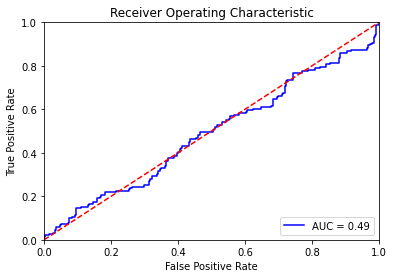

In [ ]:
probs = svm.predict_proba(xteste)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(yteste, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Modelo RBF - auto

In [ ]:
svm = SVC(kernel='rbf', C=1, gamma='auto', probability=True)
svm = svm.fit(xtreino,ytreino)
yprevisao = svm.predict(xteste)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


Matriz de Confusão

In [ ]:
# Confuse Matrix
print("Confuse Matrix: ")
print(confusion_matrix(yteste, yprevisao), "\n")  

# Classification Report
print("Classification Report: \n", classification_report(yteste, yprevisao))  


# 
print('Model of the Accuracy: ' , (accuracy_score(yteste, yprevisao) *100))

Confuse Matrix: 
[[238  14]
 [101  50]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.94      0.81       252
           1       0.78      0.33      0.47       151

    accuracy                           0.71       403
   macro avg       0.74      0.64      0.64       403
weighted avg       0.73      0.71      0.68       403

Model of the Accuracy:  71.46401985111662


Curva ROC


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


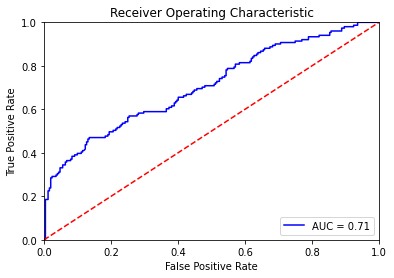

In [ ]:
probs = svm.predict_proba(xteste)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(yteste, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Modelo RBF : Scale

In [ ]:
svm = SVC(kernel='rbf', C=1, gamma='scale', probability=True)
svm = svm.fit(xtreino,ytreino)
yprevisao = svm.predict(xteste)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


Matriz de Confusão

In [ ]:
print("Confuse Matrix: ")
print(confusion_matrix(yteste, yprevisao), "\n")  

# Classification Report
print("Classification Report: \n", classification_report(yteste, yprevisao))  


# 
print('Model of the Accuracy: ' , (accuracy_score(yteste, yprevisao) *100))

Confuse Matrix: 
[[233  19]
 [ 94  57]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.92      0.80       252
           1       0.75      0.38      0.50       151

    accuracy                           0.72       403
   macro avg       0.73      0.65      0.65       403
weighted avg       0.73      0.72      0.69       403

Model of the Accuracy:  71.96029776674938


Curva ROC

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


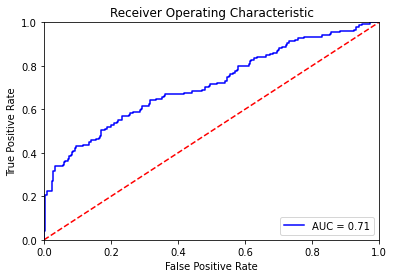

In [ ]:
probs = svm.predict_proba(xteste)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(yteste, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Polinomial : Auto, degree 3

In [ ]:
svm = SVC(kernel='poly', C=1, gamma='auto', probability=True, degree=3)
svm = svm.fit(xtreino,ytreino)
yprevisao = svm.predict(xteste)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


Matriz de Confusão

In [ ]:
print("Confuse Matrix: ")
print(confusion_matrix(yteste, yprevisao), "\n")  

# Classification Report
print("Classification Report: \n", classification_report(yteste, yprevisao))  


# 
print('Model of the Accuracy: ' , (accuracy_score(yteste, yprevisao) *100))

Confuse Matrix: 
[[249   3]
 [141  10]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.64      0.99      0.78       252
           1       0.77      0.07      0.12       151

    accuracy                           0.64       403
   macro avg       0.70      0.53      0.45       403
weighted avg       0.69      0.64      0.53       403

Model of the Accuracy:  64.26799007444168


Curva ROC

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


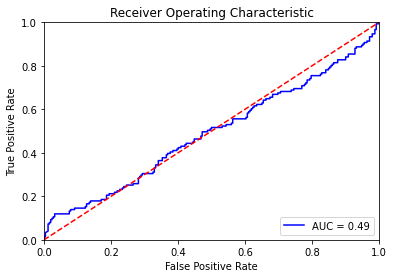

In [ ]:
probs = svm.predict_proba(xteste)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(yteste, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Polinomial : scale, degree 11

In [47]:
svm = SVC(kernel='poly', C=1, gamma='scale', probability=True, degree=11)
svm = svm.fit(xtreino,ytreino)
yprevisao = svm.predict(xteste)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


Matriz de Confusão

In [48]:
print("Confuse Matrix: ")
print(confusion_matrix(yteste, yprevisao), "\n")  

# Classification Report
print("Classification Report: \n", classification_report(yteste, yprevisao))  


# 
print('Model of the Accuracy: ' , (accuracy_score(yteste, yprevisao) *100))

Confuse Matrix: 
[[226  26]
 [134  17]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.63      0.90      0.74       252
           1       0.40      0.11      0.18       151

    accuracy                           0.60       403
   macro avg       0.51      0.50      0.46       403
weighted avg       0.54      0.60      0.53       403

Model of the Accuracy:  60.297766749379655


Curva ROC

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


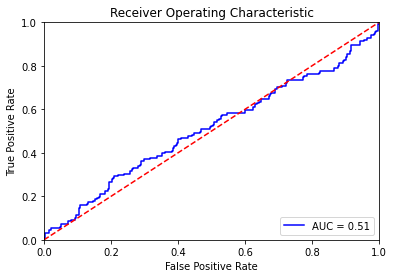

In [49]:
probs = svm.predict_proba(xteste)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(yteste, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#Multilayer Perceptron

Importando biblioteca

In [ ]:
from sklearn.neural_network import MLPClassifier

MLP default

In [ ]:
modelo_mlp = MLPClassifier(max_iter=1500, learning_rate_init=0.001, hidden_layer_sizes = (20,20), random_state=42, solver = "sgd", momentum=0.9)
modelo_mlp.fit(xtreino, ytreino)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


MLPClassifier(hidden_layer_sizes=(20, 20), max_iter=1500, random_state=42,
              solver='sgd')

Matriz de Confusão

In [ ]:
print("Confuse Matrix: ")
print(confusion_matrix(yteste, yprevisao), "\n")  

# Classification Report
print("Classification Report: \n", classification_report(yteste, yprevisao))  


# 
print('Model of the Accuracy: ' , (accuracy_score(yteste, yprevisao) *100))

Confuse Matrix: 
[[248   4]
 [147   4]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.63      0.98      0.77       252
           1       0.50      0.03      0.05       151

    accuracy                           0.63       403
   macro avg       0.56      0.51      0.41       403
weighted avg       0.58      0.63      0.50       403

Model of the Accuracy:  62.531017369727046


Curva ROC

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


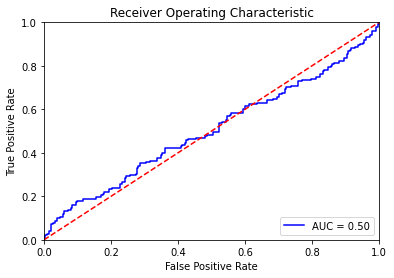

In [ ]:
probs = svm.predict_proba(xteste)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(yteste, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

MLP momentum = 0.43, learn_data_ratio = 0.09

In [ ]:
modelo_mlp = MLPClassifier(max_iter=1500, learning_rate_init=0.09, hidden_layer_sizes = (20,20), random_state=42, solver = "sgd", momentum=0.43)
modelo_mlp.fit(xtreino, ytreino)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


MLPClassifier(hidden_layer_sizes=(20, 20), learning_rate_init=0.09,
              max_iter=1500, momentum=0.43, random_state=42, solver='sgd')

Matriz de Confusão

In [ ]:
print("Confuse Matrix: ")
print(confusion_matrix(yteste, yprevisao), "\n")  

# Classification Report
print("Classification Report: \n", classification_report(yteste, yprevisao))  


# 
print('Model of the Accuracy: ' , (accuracy_score(yteste, yprevisao) *100))

Confuse Matrix: 
[[248   4]
 [147   4]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.63      0.98      0.77       252
           1       0.50      0.03      0.05       151

    accuracy                           0.63       403
   macro avg       0.56      0.51      0.41       403
weighted avg       0.58      0.63      0.50       403

Model of the Accuracy:  62.531017369727046


Curva ROC

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


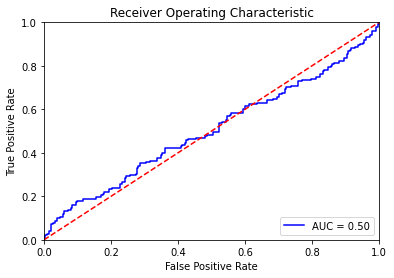

In [ ]:
probs = svm.predict_proba(xteste)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(yteste, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

MLP momentum = 0.75, learn_data_ratio = 0.5



In [ ]:
modelo_mlp = MLPClassifier(max_iter=1500, learning_rate_init=0.5, hidden_layer_sizes = (20,20), random_state=42, solver = "sgd", momentum=0.75)
modelo_mlp.fit(xtreino, ytreino)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


MLPClassifier(hidden_layer_sizes=(20, 20), learning_rate_init=0.5,
              max_iter=1500, momentum=0.75, random_state=42, solver='sgd')

Matriz de Confusão

In [ ]:
print("Confuse Matrix: ")
print(confusion_matrix(yteste, yprevisao), "\n")  

# Classification Report
print("Classification Report: \n", classification_report(yteste, yprevisao))  


# 
print('Model of the Accuracy: ' , (accuracy_score(yteste, yprevisao) *100))

Confuse Matrix: 
[[248   4]
 [147   4]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.63      0.98      0.77       252
           1       0.50      0.03      0.05       151

    accuracy                           0.63       403
   macro avg       0.56      0.51      0.41       403
weighted avg       0.58      0.63      0.50       403

Model of the Accuracy:  62.531017369727046


Curva ROC

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


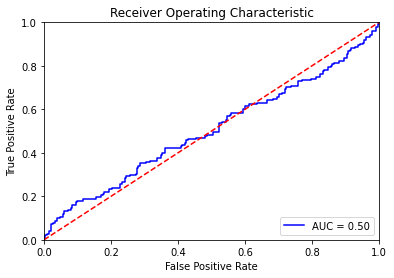

In [ ]:
probs = svm.predict_proba(xteste)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(yteste, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()